# Implementing Grover's algorithm
Now that we've learned how to apply gates on qubits, we are going to put them together to create quantum algorithms! One of the most famous quantum algorithms is Grover's algorithm, and is used to find marked answers among many possible answers. For instance, finding the shelf number for bananas in a big warehouse. 

See https://github.com/Qiskit/iqx-user-guide/blob/master/rst/full-user-guide/004-Quantum_Algorithms/070-Grover's_Algorithm.rst for inspiration


In [36]:
from quantum_functions import black_box_check
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import Aer, IBMQ, execute
from qiskit.tools.visualization import circuit_drawer, plot_histogram

import pandas as pd
import numpy as np

In [21]:
pd.read_csv("data/fruits.csv", sep=';')

,name,shelf
0,apple,1
1,banana,2
2,orange,0
3,strawberry,3



<div>
<img src="pictures/black_box_grover.png" width="700"/>
</div>
<div>
<img src="pictures/reflection_about_average.png" width="400"/>
</div>


In [3]:
def reflection_about_average(circuit, q):
    # Reflection about average for amplitude amplification
    circuit.h(q)   
    circuit.x(q)
    circuit.h(q[1])
    circuit.cx(q[0], q[1])
    circuit.h(q[1])
    circuit.x(q)
    circuit.h(q)

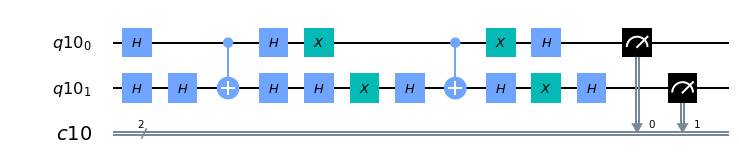

In [20]:
# Define reqisters and circuit
NQ=2
qreg = QuantumRegister(NQ)
creg = ClassicalRegister(NQ)
grover = QuantumCircuit(qreg, creg)

# Initialization of quantum registers
grover.h(qreg)

# The name of fruit to search for its shelf number: 
# Options: apple, banana, orange, strawberry
fruit_to_find = 'strawberry'

# Grover's amplitude amplification (only one iteration here)
# Complete the code here: you need to call oracle and reflection functions.
# You can find the definition of these functions in the file: quantum_functions.py
# The oracle is loaded as black_box_check(grover, fruit_to_find, qreg)
#    It has three arguments: quantum circuit, property to search, and quantum register
# The reflection function is loaded as reflection_about_average
#    It has two arguments: quantum circuit and quantum register
black_box_check(grover, fruit_to_find, qreg)
reflection_about_average(grover, qreg)


# Add Measurement
grover.measure(qreg, creg)

# Draw circuit
grover.draw(output='mpl')

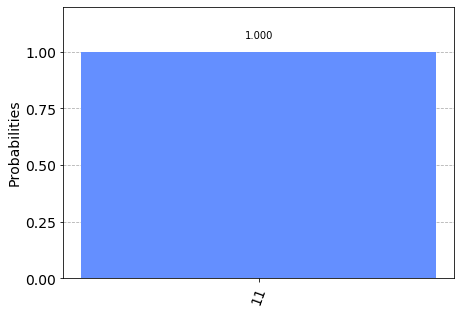

In [17]:
# Execute and collect results
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(grover, backend, shots=10)
sim_result = job_sim.result()

# Print result counts
plot_histogram(sim_result.get_counts(grover))

In [18]:
shelf = int(max(sim_result.get_counts(grover)), 2)
print("")
print("I found '{:}'! The shelf number is: {:}".format(fruit_to_find, shelf))


I found 'strawberry'! The shelf number is: 3
